# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(weather_api_key)

9fc6f6a87957b5e0829be769afac7e46


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"
weather_list = []
i=1
j=1
n=1
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    if j % 50 ==0:
        time.sleep(60)
        n = n+1
        i = 1
    try:
        weather_dict = {}
        query_url = f"{url}&q={city}"
        #print(query_url)
        #print(requests.get(query_url))
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temperature = weather_json["main"]["temp_max"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        humidity = weather_json["main"]["humidity"]
        cloudy = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        #date = weather_json["sys"]["country"]
        weather_dict["Cities"] = city
        weather_dict["Max Temp"] = temperature
        weather_dict["Lat"] = latitude
        weather_dict["Lng"] = longitude
        weather_dict["Humidity"] = humidity
        weather_dict["Wind Speed"] = wind
        weather_dict["Cloudiness"] = cloudy
        weather_dict["Country"] = country
        weather_list.append(weather_dict)
        print(f"Processing Record {i} in set {n}| {city}")
        i=i+1
        j = j+1
    except:
        print("City not found. Skipping...")
        j = j+1



Beginning Data Retrieval
-----------------------------
Processing Record 1 in set 1| kapaa
Processing Record 2 in set 1| busselton
Processing Record 3 in set 1| faya
Processing Record 4 in set 1| avarua
Processing Record 5 in set 1| lima
Processing Record 6 in set 1| coquimbo
Processing Record 7 in set 1| bredasdorp
Processing Record 8 in set 1| bluff
Processing Record 9 in set 1| yellowknife
Processing Record 10 in set 1| albany
Processing Record 11 in set 1| whitefish
Processing Record 12 in set 1| mataura
Processing Record 13 in set 1| saskylakh
Processing Record 14 in set 1| bengkulu
Processing Record 15 in set 1| vaini
Processing Record 16 in set 1| rikitea
Processing Record 17 in set 1| carnarvon
Processing Record 18 in set 1| bethel
Processing Record 19 in set 1| puerto ayora
Processing Record 20 in set 1| namibe
Processing Record 21 in set 1| rio cuarto
Processing Record 22 in set 1| springbok
Processing Record 23 in set 1| butaritari
Processing Record 24 in set 1| garowe
City 

Processing Record 11 in set 5| alta floresta
Processing Record 12 in set 5| opuwo
Processing Record 13 in set 5| kempsey
Processing Record 14 in set 5| los llanos de aridane
Processing Record 15 in set 5| papetoai
City not found. Skipping...
City not found. Skipping...
Processing Record 16 in set 5| severo-kurilsk
Processing Record 17 in set 5| tupelo
Processing Record 18 in set 5| saint-philippe
Processing Record 19 in set 5| rocha
Processing Record 20 in set 5| hamilton
Processing Record 21 in set 5| richards bay
Processing Record 22 in set 5| mattru
Processing Record 23 in set 5| sao joao da barra
Processing Record 24 in set 5| hasaki
Processing Record 25 in set 5| gallipoli
Processing Record 26 in set 5| medyn
Processing Record 27 in set 5| point fortin
Processing Record 28 in set 5| murgud
Processing Record 29 in set 5| mackay
Processing Record 30 in set 5| ouango
Processing Record 31 in set 5| humberto de campos
Processing Record 32 in set 5| hami
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 25 in set 9| henties bay
Processing Record 26 in set 9| kulaman
Processing Record 27 in set 9| del monte
Processing Record 28 in set 9| whitehorse
Processing Record 29 in set 9| kawalu
Processing Record 30 in set 9| crib point
Processing Record 31 in set 9| sibolga
Processing Record 32 in set 9| partur
Processing Record 33 in set 9| aswan
Processing Record 34 in set 9| lagoa
Processing Record 35 in set 9| roebourne
Processing Record 36 in set 9| sirawai
Processing Record 37 in set 9| mahebourg
Processing Record 38 in set 9| ereymentau
Processing Record 39 in set 9| lixourion
Processing Record 40 in set 9| clyde river
City not found. Skipping...
Processing Record 41 in set 9| tefe
Processing Record 42 in set 9| komsomolskiy
Processing Record 43 in set 9| half moon bay
Processing Record 44 in set 9| kenora
Processing Record 45 in set 9| maragogi
Processing Record 46 in set 9| warrington
Processing Record 47 in set 9| fallon
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = pd.DataFrame(weather_list)
weather.to_csv("weather_info.csv")
weather.head()


,Cities,Max Temp,Lat,Lng,Humidity,Wind Speed,Cloudiness,Country
0,kapaa,78.8,22.08,-159.32,74,17.22,90,US
1,busselton,45.0,-33.65,115.33,70,5.10,0,AU
2,faya,66.2,18.39,42.45,55,2.62,57,SA
3,avarua,80.6,-21.21,-159.78,65,10.29,40,CK
4,lima,64.4,-12.04,-77.03,77,10.29,75,PE


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_too_high = weather.loc[weather["Humidity"]>100]

In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_too_high

,Cities,Max Temp,Lat,Lng,Humidity,Wind Speed,Cloudiness,Country


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

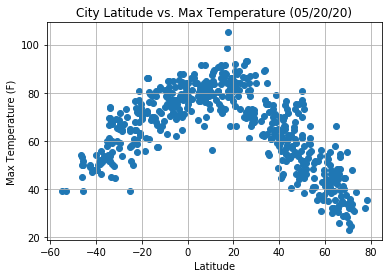

In [9]:
x = weather["Lat"]
y= weather["Max Temp"]
plt.scatter(x, y)
plt.title('City Latitude vs. Max Temperature (05/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../Images/Lat_vs_Temp")

* It appears that the closer a country's latitude is to the equator (0) the higher the Max Termperature is.

## Latitude vs. Humidity Plot

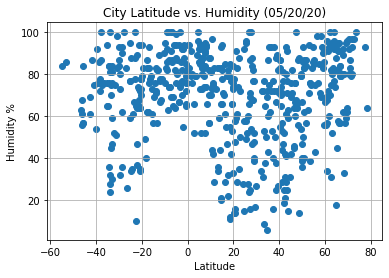

In [10]:
x = weather["Lat"]
y= weather["Humidity"]
plt.scatter(x, y)
plt.title('City Latitude vs. Humidity (05/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("../Images/Lat_vs_Humidity")

* The most instances of humidit % between 0-40 occur between latitudes of 20-60.
* There seem to be few countries around the equator with humidity % below 60.

## Latitude vs. Cloudiness Plot

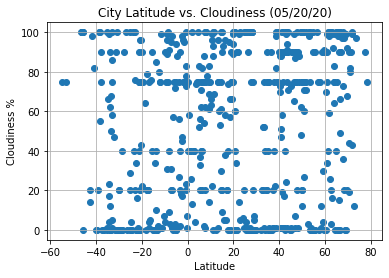

In [11]:
x = weather["Lat"]
y= weather["Cloudiness"]
plt.scatter(x, y)
plt.title('City Latitude vs. Cloudiness (05/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("../Images/Lat_vs_Cloudiness")

* Cloudiness appears to have no relationship to latitude.

## Latitude vs. Wind Speed Plot

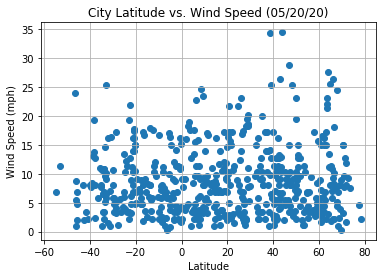

In [12]:
x = weather["Lat"]
y= weather["Wind Speed"]
plt.scatter(x, y)
plt.title('City Latitude vs. Wind Speed (05/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/Lat_vs_Wind Speed")

* Wind speed appears to have little relationship to latitude.
* On the day these numbers were pulled (5/17/20) there appears to be few countries with wind speeds higher than 25 mph. Perhaps there were not many storms on this day.

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def graph(x,y, x_label, y_label, equation_position, hemisphere):
    correlation = st.pearsonr(x, y)


    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x ,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,equation_position,fontsize=15,color="red")
    plt.ylabel(f'{y_label}')
    plt.xlabel(f'{x_label}')
    plt.title(f'{x_label} vs. {y_label} in the {hemisphere} hemisphere on 5/20/20')
    plt.savefig(f"../Images/{hemisphere}_{x_label}_vs_{y_label}")



    print(f"The correlation between both factors is {round(correlation[0],2)}")

    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
southern_hem = weather.loc[weather["Lat"]<0]
northern_hem = weather.loc[weather["Lat"]>=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.86


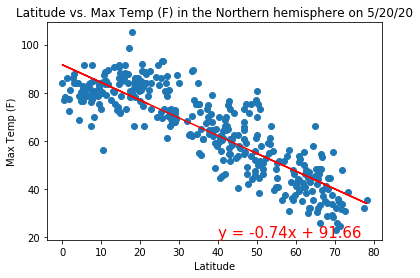

In [15]:
graph(northern_hem["Lat"],northern_hem["Max Temp"], "Latitude", "Max Temp (F)", (40,20), "Northern")

* There is a strong negative correlation between distance from the equator and Max Temperature.
* This means the further you are from the equator, the colder you max temperature tends to be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.78


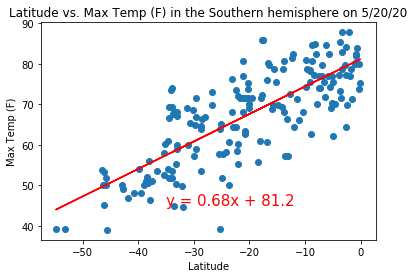

In [16]:
graph(southern_hem["Lat"],southern_hem["Max Temp"], "Latitude", "Max Temp (F)", (-35, 45), "Southern")

* There is a strog positive correlation between Max Temp and Latitude when looking at the southern hemisphere.
* This is because now as latitude values get larger they are getting closer to zero (or the equator) and tempertures are increasing

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.09


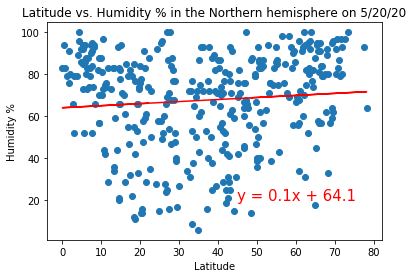

In [17]:
graph(northern_hem["Lat"],northern_hem["Humidity"], "Latitude", "Humidity %", (45, 20), "Northern")

* There appears to be little correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.24


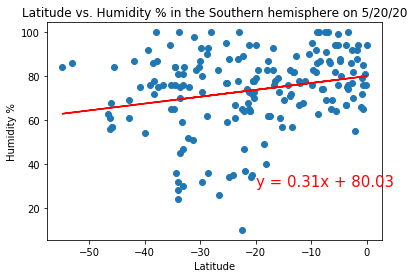

In [18]:
graph(southern_hem["Lat"],southern_hem["Humidity"], "Latitude", "Humidity %", (-20, 30), "Southern")

* There is still a very low correlation factor between humidity and latitude in the southern hemisphere.
* There appear to be fewer countries with humidity below 40% in the southern hemisphere than in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07


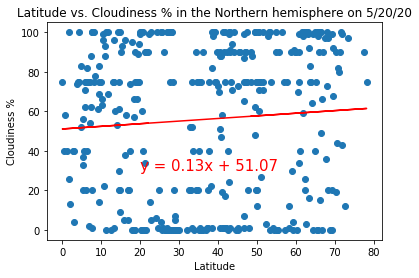

<Figure size 432x288 with 0 Axes>

In [19]:
graph(northern_hem["Lat"],northern_hem["Cloudiness"], "Latitude", "Cloudiness %", (20, 30), "Northern")
plt.savefig("../Images/NH_Cloudiness_vs_Lat")

* Cloudiness and latitude appear to have almost no correlation in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.02


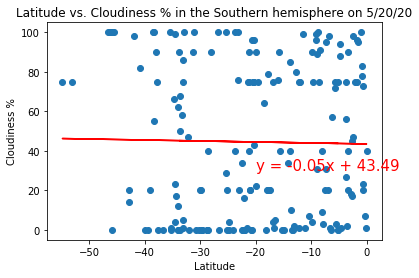

In [20]:
graph(southern_hem["Lat"],southern_hem["Cloudiness"], "Latitude", "Cloudiness %", (-20, 30), "Southern")

* Cloudiness and latitude appear to have almost no correlation in the southern hemisphere as well.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.02


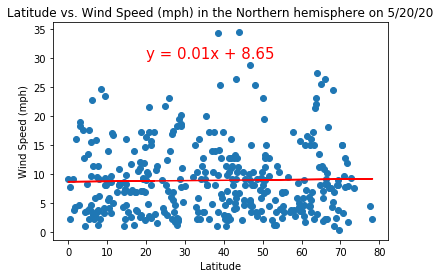

In [21]:
graph(northern_hem["Lat"],northern_hem["Wind Speed"], "Latitude", "Wind Speed (mph)", (20, 30), "Northern")

* Wind Speed appears to have no correlation with latitude in the northern hemisphere.
* Very few cities reported winds higher than 25 mph in the northern hemisphere on 5/17/20.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.06


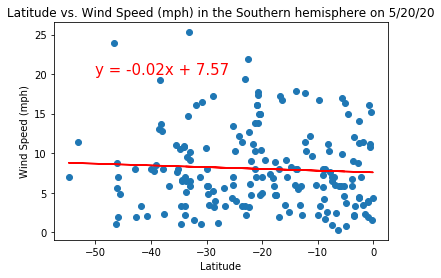

In [22]:
graph(southern_hem["Lat"],southern_hem["Wind Speed"], "Latitude", "Wind Speed (mph)", (-50, 20), "Southern")

* Wind Speed appears to have no correlation with latitude in the southern hemisphere.
* Very few countries had wind speeds above 20 mph in the southern hemisphere. This shows a slightly smaller distribution than in the northern hemisphere. However, this could be because there are fewer cities from the random sample in the southern hemisphere.